In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "data/plant-seedlings/"

In [4]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [5]:
label_df = pd.read_csv(label_csv)

## Removing space between class names

In [ ]:
label_df.species = label_df.species.apply(lambda x: re.sub(' ', '_', x))
label_df.to_csv(f'{PATH}labels.csv', index=False)

## Pivot table

In [ ]:
label_df.pivot_table(index='species', aggfunc=len).sort_values('file', ascending=False)

## Analysis

In [16]:
def get_sizes(s):
    sz = [PIL.Image.open(f'{PATH}{s}/'+k).size for k in os.listdir(f'{PATH}{s}/')]
    height = np.array([sz[i][0] for i in range(len(sz))])
    width = np.array([sz[i][1] for i in range(len(sz))])
    return height, width

In [17]:
trn_h, trn_w = get_sizes('train'); test_h, test_w = get_sizes('test')

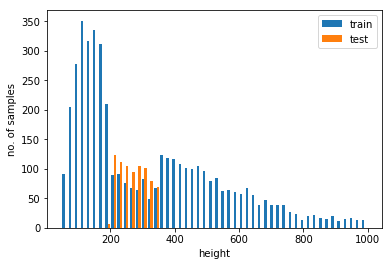

In [27]:
plt.hist([trn_h[trn_h<1000], test_h[test_h<1000]], bins=50); 
plt.xlabel('height'); plt.ylabel('no. of samples'); plt.legend(['train', 'test']);

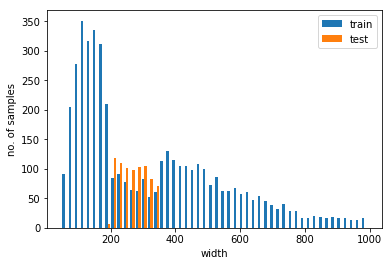

In [28]:
plt.hist([trn_w[trn_w<1000], test_w[test_w<1000]], bins=50); 
plt.xlabel('width'); plt.ylabel('no. of samples'); plt.legend(['train', 'test']);

## Training setup

In [ ]:
sz = 224
arch = resnet50
bs = 32

In [ ]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [ ]:
data = get_data(sz, bs)

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
learn.lr_find()

In [ ]:
learn.sched.plot()

In [ ]:
lr = 1e-2

In [ ]:
learn.fit(lr, 3, cycle_len=2)

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [ ]:
learn.fit(lr, 2, cycle_len=2)

In [ ]:
learn.precompute=False
learn.bn_freeze=True

In [ ]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.fit(lr, 2, cycle_len=1)

In [ ]:
learn.unfreeze()

In [ ]:
lrs = np.array([lr/20,lr/10,lr])

In [ ]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save(f'{sz}')

In [ ]:
sz = 299

In [ ]:
learn.set_data(get_data(sz, bs))

In [ ]:
learn.freeze()
learn.fit(lr, 2, cycle_len=2)

In [ ]:
learn.fit(lr, 2, cycle_len=1, wds=0.025, use_wd_sched=True, cycle_mult=2)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

In [ ]:
wd=0.025

In [ ]:
learn.fit(lrs, 2, cycle_len=1, wds=[wd/18, wd/9, wd/2], use_wd_sched=True, cycle_mult=2)

In [ ]:
learn.save(f'{sz}')

In [ ]:
sz = 400

In [ ]:
from sklearn import metrics

In [ ]:
learn.set_data(get_data(sz, bs))

In [ ]:
learn.freeze()
learn.fit(lr, 2, cycle_len=1)

In [ ]:
learn.fit(lr, 2, cycle_len=1, wds=wd, use_wd_sched=True, cycle_mult=2)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save(f'{sz}')

In [ ]:
learn.fit(lrs, 2, cycle_len=1, wds=[wd/18, wd/9, wd/2], use_wd_sched=True, cycle_mult=2)

In [ ]:
learn.save(f'{sz}'+'_wds')

In [ ]:
learn.load(f'{sz}'+'_wds')

In [ ]:
sz = 450

In [ ]:
learn.set_data(get_data(sz, 16))

In [ ]:
learn.freeze()
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save(f'{sz}')

In [ ]:
learn.fit(lrs, 2, cycle_len=1, wds=[wd/18, wd/9, wd/2], use_wd_sched=True, cycle_mult=2)

In [ ]:
learn.save(f'{sz}'+'_wds')

In [ ]:
sz = 500

In [ ]:
learn.set_data(get_data(sz, 16))

In [ ]:
learn.freeze()
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save(f'{sz}')

In [ ]:
learn.fit(lrs, 2, cycle_len=1, wds=[wd/18, wd/9, wd/2], use_wd_sched=True, cycle_mult=2)

In [ ]:
learn.save(f'{sz}'+'_wds')

In [ ]:
learn.load('500_wds')

## Old steps

In [ ]:
learn.set_data(get_data(299, bs))
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('299_r50')

In [ ]:
learn.load('299_r50')

In [ ]:
learn.set_data(get_data(350, bs))
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('350_r50')

In [ ]:
learn.load('350_r50')

In [ ]:
log_preds, y = learn.TTA()
probs = np.exp(log_preds)

In [ ]:
accuracy(log_preds, y)

In [ ]:
metrics.f1_score()

In [ ]:
learn.save('350_r50')

## Prediction

In [ ]:
log_preds, y = learn.TTA(is_test=True)

In [ ]:
log_preds.shape

In [ ]:
probs = np.mean(np.exp(log_preds), axis=0); probs

In [ ]:
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()

In [ ]:
save_array('probs_500.bc', probs)

## Save to file for submission

In [ ]:
def load_array(fname): return bcolz.open(fname)[:]

In [ ]:
probs_400 = load_array('probs_400.bc')
probs_450 = load_array('probs_450.bc')
probs_500 = load_array('probs_500.bc')

In [ ]:
probs = (probs_450 + probs_450 + probs_500)/3

In [ ]:
data.classes

In [ ]:
df = pd.DataFrame(np.argmax(probs, axis=1))

In [ ]:
df.insert(0, 'file', [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.columns = ['file', 'species']

In [ ]:
df.species = df.species.apply(lambda x: data.classes[x])

In [ ]:
df.species = df.species.apply(lambda x: re.sub('_', ' ', x))

In [ ]:
df.file = df.file.apply(lambda x: str(x) + '.png')

In [ ]:
SUBM = f'{PATH}results/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}submission-5.csv', index=False)
#df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)